In [2]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/data_week4/heart_failure_clinical_records_dataset.csv')

In [3]:
data.platelets = data.platelets.astype(int)
data.age = data.age.astype(int)
data.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,20,1,265000,1.9,130,1,0,4,1
1,55,0,7861,0,38,0,263358,1.1,136,1,0,6,1
2,65,0,146,0,20,0,162000,1.3,129,1,1,7,1
3,50,1,111,0,20,0,210000,1.9,137,1,0,7,1
4,65,1,160,1,20,0,327000,2.7,116,0,0,8,1


In [4]:
print(data.dtypes)

age                           int64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                     int64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object


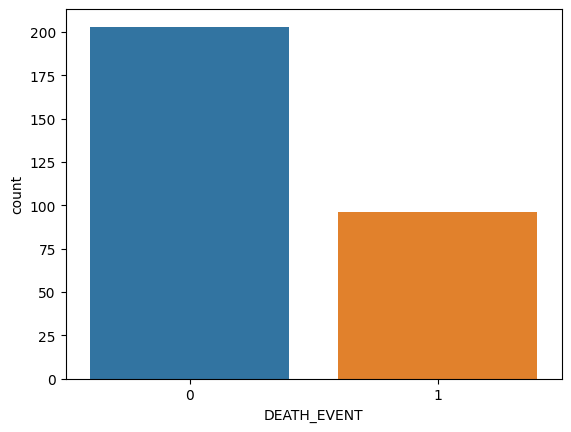

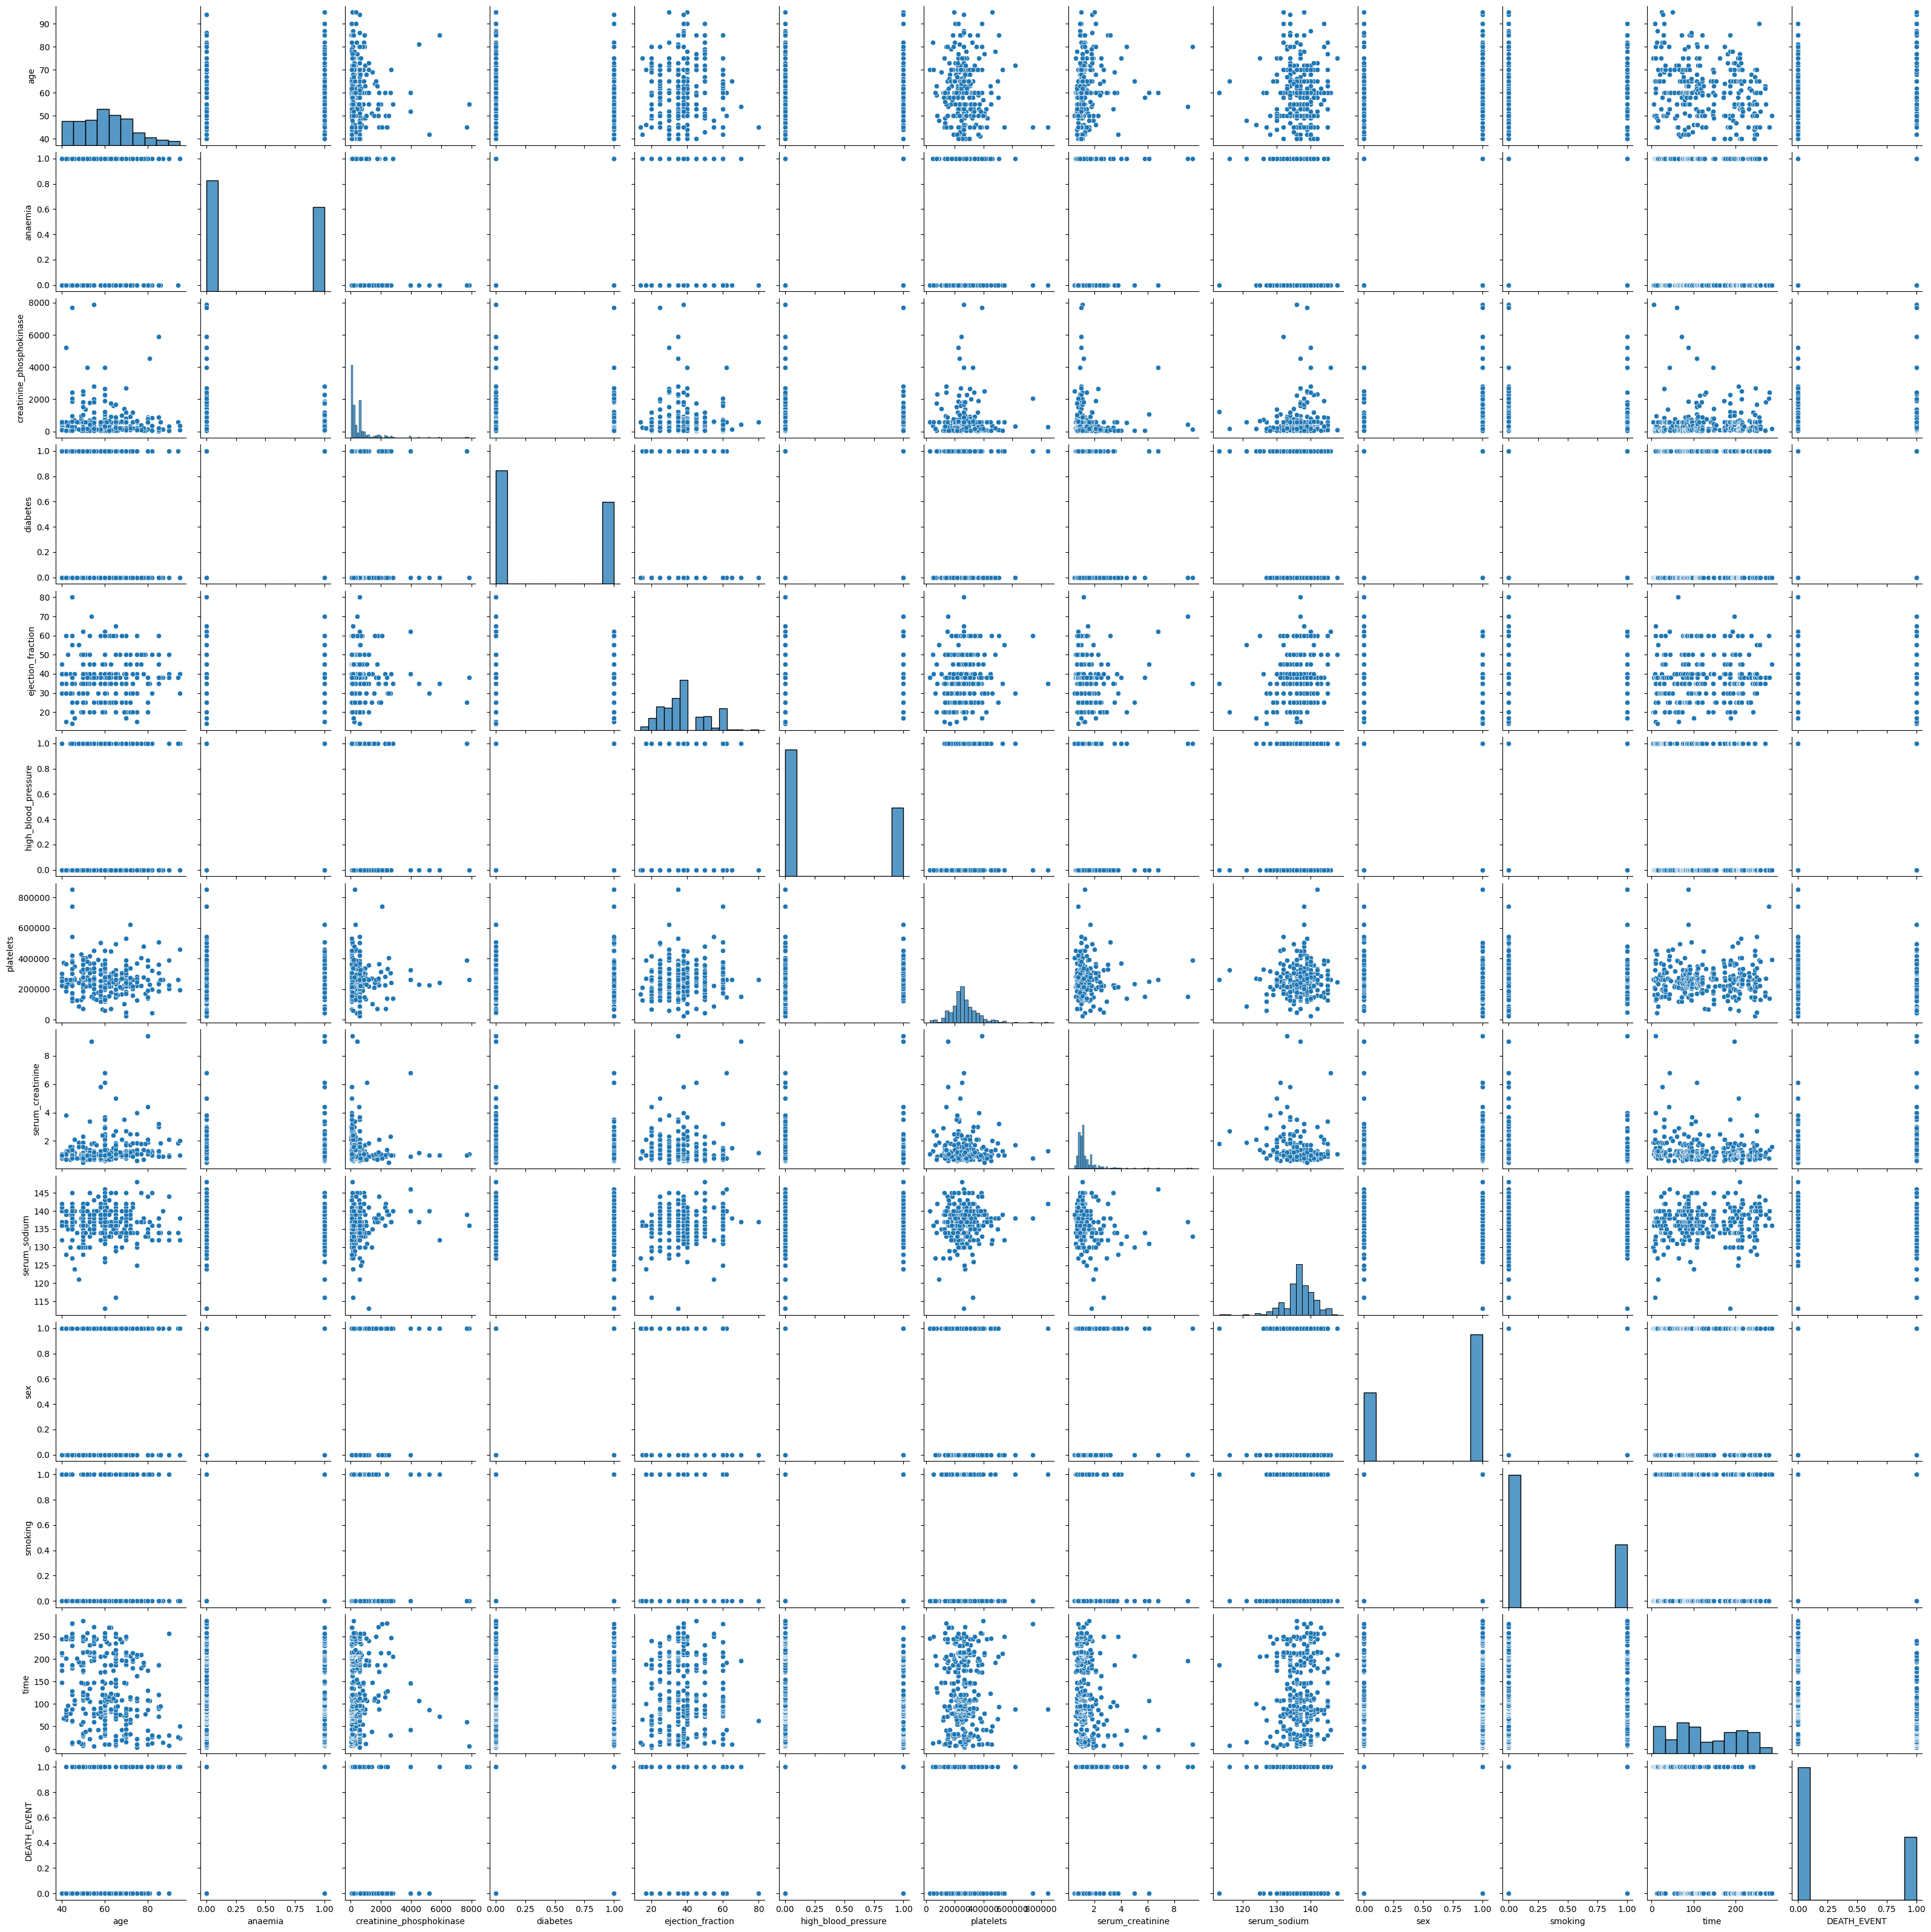

In [5]:
import seaborn as sns
sns.countplot(x=data['DEATH_EVENT'])
sns.pairplot(data)

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'anaemia'}>,
        <Axes: title={'center': 'creatinine_phosphokinase'}>,
        <Axes: title={'center': 'diabetes'}>],
       [<Axes: title={'center': 'ejection_fraction'}>,
        <Axes: title={'center': 'high_blood_pressure'}>,
        <Axes: title={'center': 'platelets'}>,
        <Axes: title={'center': 'serum_creatinine'}>],
       [<Axes: title={'center': 'serum_sodium'}>,
        <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'smoking'}>,
        <Axes: title={'center': 'time'}>],
       [<Axes: title={'center': 'DEATH_EVENT'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

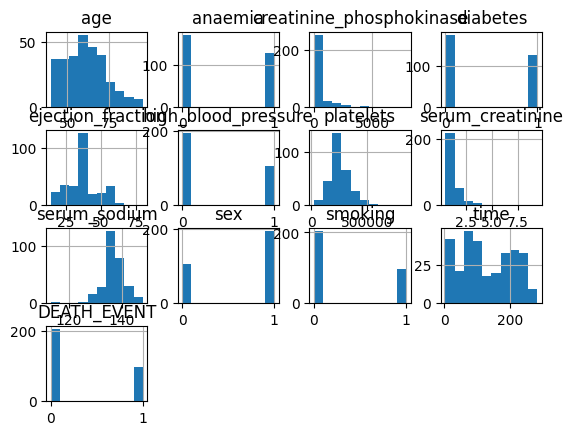

In [6]:
import matplotlib as plt
data.hist()

                               age   anaemia  creatinine_phosphokinase  \
age                       1.000000  0.087574                 -0.081406   
anaemia                   0.087574  1.000000                 -0.190741   
creatinine_phosphokinase -0.081406 -0.190741                  1.000000   
diabetes                 -0.101454 -0.012729                 -0.009639   
ejection_fraction         0.060195  0.031557                 -0.044080   
high_blood_pressure       0.093170  0.038182                 -0.070590   
platelets                -0.052475 -0.043786                  0.024463   
serum_creatinine          0.159237  0.052174                 -0.016408   
serum_sodium             -0.045912  0.041882                  0.059550   
sex                       0.065546 -0.094769                  0.079791   
smoking                   0.018926 -0.107290                  0.002421   
time                     -0.224265 -0.141414                 -0.009346   
DEATH_EVENT               0.253581  0.

<Axes: >

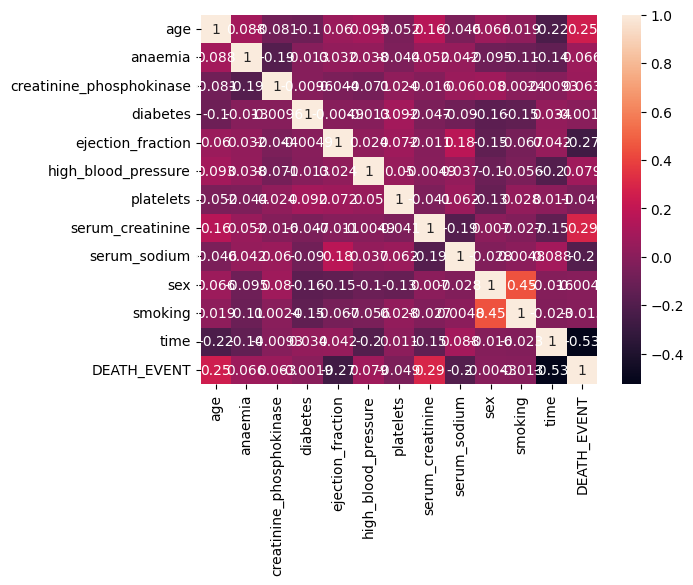

In [7]:
correlation = data.corr()
print(correlation)
sns.heatmap(correlation, annot = True)

In [8]:
from sklearn import datasets
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler 

In [20]:
x = data.loc[:,['age','anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','platelets','serum_creatinine','serum_sodium','sex','smoking','time']]
y = data.loc[:,['DEATH_EVENT']]

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [22]:
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

In [12]:
data.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,20,1,265000,1.9,130,1,0,4,1
1,55,0,7861,0,38,0,263358,1.1,136,1,0,6,1
2,65,0,146,0,20,0,162000,1.3,129,1,1,7,1
3,50,1,111,0,20,0,210000,1.9,137,1,0,7,1
4,65,1,160,1,20,0,327000,2.7,116,0,0,8,1


In [23]:
model = Perceptron(max_iter=100, eta0=0.05, random_state=0)
model.fit(x_train, y_train)
print('Accuray rate of pre-scaled model:',model.score(x_test, y_test))
x1=[[46,0,4562,1,30,1,23500,1.5,112,0,1,5],[65,1,3599,0,42,1,145000,2.6,143,0,0,6]]
y1= model.predict(x1)
print(y1)

Accuray rate of pre-scaled model: 0.3
[1 1]


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


In [24]:
model = Perceptron(max_iter=100, eta0=0.05, random_state=0)
model.fit(x_train_std, y_train)
print('Accuray rate of post-scaled model:',model.score(x_test_std, y_test))
x2=[[46,0,4562,1,30,1,23500,1.5,112,0,1,5],[65,1,3599,0,42,1,145000,2.6,143,0,0,6]]
y2= model.predict(x2)
print(y2)

Accuray rate of post-scaled model: 0.8222222222222222
[1 0]


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
